In [ ]:
# !pip install catboost

In [ ]:
import math
import numpy as np
import pandas as pd
import pandas_profiling
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

%matplotlib inline

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
df_bf = pd.read_csv('BlackFriday.csv', sep=",")

#pandas_profiling.ProfileReport(df_bf)

In [ ]:
df_bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df_bf.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [ ]:
df_bf['Product_Category_2'].fillna(99, inplace=True)
df_bf['Product_Category_3'].fillna(99, inplace=True)

In [ ]:
df_bf.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [ ]:
df_bf.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [ ]:
df_prod = df_bf.groupby('Product_ID').sum()['Purchase']
df_prod

Product_ID
P00000142    12592163
P00000242     3914901
P00000342     1261383
P00000442      441173
P00000542      791219
P00000642     7635578
P00000742     1435959
P00000842      360314
P00000942      573183
P00001042     6787184
P00001142     3821804
P00001242      421327
P00001342      518420
P00001442      612829
P00001542      628586
P00001642     2642227
P00001742     3585330
P00001842     1095944
P00001942      901749
P00002042      874053
P00002142    10322944
P00002242     2637721
P00002342      784352
P00002442     2072076
P00002542     3891418
P00002642      425676
P00002742      234684
P00002842     1236432
P00002942     2880524
P00003042      278597
               ...   
P0096942      1414144
P0097042      1326964
P0097142       664194
P0097242     14249873
P0097342      3750556
P0097442        37913
P0097542        45663
P0097642         6120
P0097742      1960977
P0097842      1689168
P0097942       347768
P0098042       135407
P0098142       333743
P0098242      3025773

## **Análise Explotatória**

## Quais os produtos mais rentáveis?

In [ ]:
pd.DataFrame(df_prod)

,Purchase
Product_ID,
P00000142,12592163
P00000242,3914901
P00000342,1261383
P00000442,441173
P00000542,791219
P00000642,7635578
P00000742,1435959
P00000842,360314
P00000942,573183


In [ ]:
df_prod.columns = ['Produtos','Vendas']

In [ ]:
df_prod = df_prod.sort_values(ascending=False)

In [ ]:
df_prod = df_prod[:10]

In [ ]:
df_prod

Product_ID
P00025442    27532426
P00110742    26382569
P00255842    24652442
P00184942    24060871
P00059442    23948299
P00112142    23882624
P00110942    23232538
P00237542    23096487
P00057642    22493690
P00010742    21865042
Name: Purchase, dtype: int64

In [ ]:
df_bf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


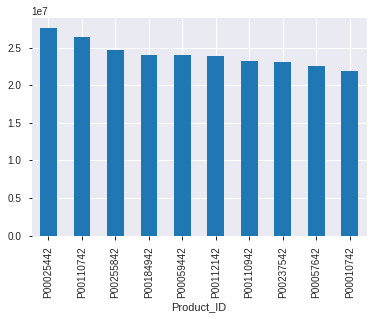

In [ ]:
df_prod.plot.bar()

Não houve um produto com uma receita muito superior em relação aos demais.
No gráfico acima podemos observar isto e também quais foram os produtos mais rantáveis.

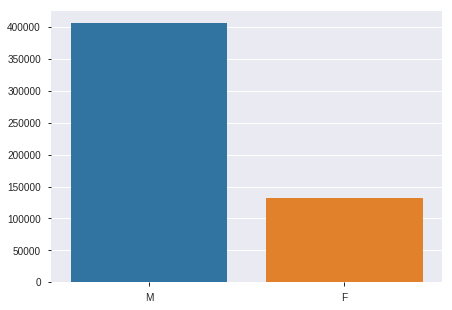

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x=df_bf.Gender.value_counts().index,y=df_bf.Gender.value_counts().values )
plt.show()

# Como foram os gastos de acordo com as faixas etárias?

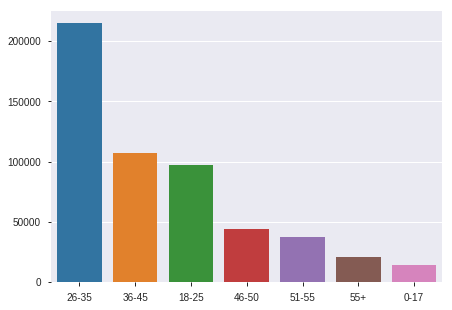

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(x=df_bf.Age.value_counts().index, y=df_bf.Age.value_counts().values)
plt.show()

Através do gráfico podemos assegurar que os consumidores entre 26 e 35 anos foram os que mais compraram.

# Quais os consumidores que mais gastaram?

In [ ]:
moneybox = []
lista_consumidores = list(df_bf.User_ID.unique())

for i in lista_consumidores:
    money = df_bf[df_bf.User_ID == i].Purchase.sum()
    moneybox.append(money)

In [ ]:
compras_por_usuarios = pd.DataFrame(dict(Users=lista_consumidores, Purchases=moneybox))
indices = (compras_por_usuarios.Purchases.sort_values(ascending=False)).index.values[:10]
compras_por_usuarios = compras_por_usuarios.reindex(indices).iloc[:10]
compras_por_usuarios

,Users,Purchases
3772,1004277,10536783
1488,1001680,8699232
2555,1002909,7577505
1716,1001941,6817493
386,1000424,6573609
3921,1004448,6565878
899,1001015,6511302
2976,1003391,6476786
1049,1001181,6387899
489,1000549,6310604


Na tabela acima, está listado os 10 consumidores que mais gastaram, de acordo com os dados fornecidos.

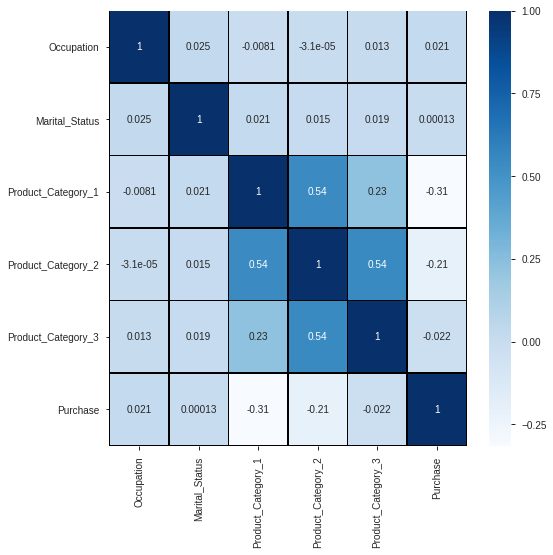

In [ ]:
df_bf2 = df_bf.drop(['User_ID'],axis=1)

plt.figure(figsize=(8,8))
sns.heatmap(df_bf2.corr(), annot=True, linewidths=0.5, linecolor='black', cmap='Blues')
plt.xticks(rotation=90)
plt.show()

Através do mapa de calor, podemos observar que não há correlação significativa.

## Transformação dos dados

In [ ]:
# Categóricos
le = preprocessing.LabelEncoder()

#df_bf['User_ID'] = le.fit_transform(df_bf['User_ID'])
#df_bf['Product_ID'] = le.fit_transform(df_bf['Product_ID'])
df_bf['Age']=le.fit_transform(df_bf['Age'])
df_bf['City_Category']=le.fit_transform(df_bf['City_Category'])
df_bf['Stay_In_Current_City_Years']=le.fit_transform(df_bf['Stay_In_Current_City_Years'])

# Dummies
df_bf = pd.get_dummies(df_bf, columns=['Gender'])

Vamos dividir o conjunto de dados em treinamento e testes e preparar as entradas e saídas

In [ ]:
X = df_bf.drop(['User_ID', 'Product_ID', 'Product_Category_3', 'Product_Category_2','Purchase'], axis=1)
y = df_bf['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, shuffle=False)

## Modelos

Começamos com XGBoost Regressor

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

/home/soutes/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:52:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 5761.716923


Abaixo aplicamos outros algoritmos para fins de comparação com o modelo anterior e avaliar qual o mais indicado para este DataFrame.

In [ ]:
models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['CatBoost: ', CatBoostRegressor(logging_level='Silent')],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]

print("Results...")


for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results...
DecisionTree : 3002.9215262932426
Linear Regression : 4721.393844259144


/home/soutes/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForest : 2977.567601028236
KNeighbours : 3626.792736994
AdaBoostClassifier : 3520.581921838738
GradientBoostingClassifier:  3026.5341798510176
CatBoost:  2993.191213272116
Lasso:  4721.405820393603
Ridge:  4721.39384387686
BayesianRidge:  4721.393766519445
ElasticNet:  4725.168241827376
HuberRegressor:  4816.322680385044


Abaixo aplico novamente os modelos Regressão Linear e Árvore de Decisão, apenas para visualizar seus resultados através do seu respectivo score:

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

score = lr.score(X_train, y_train)
predict = lr.predict(X_train)

print('Regressão Linear: ' + str(score))

Regressão Linear: 0.10549229662862813


In [ ]:
dt = DecisionTreeRegressor()
dt = dt.fit(X_train, y_train)

dt.score(X_test,y_test)
score = dt.score(X_test,y_test)

print('Árvores de decisão: ' + str(score))

Árvores de decisão: 0.638124009395947
